<a href="https://colab.research.google.com/github/marialejandrapulido1/analitica-negocios/blob/main/PARCIAL_2_MAPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maria Alejandra Pulido**

Parcial 2 - Redes neuronales

# **WACCS**

**Cargar librerias y conectar con Drive**

In [1]:
#cargar librerias
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#configuracion para modelo neuronal
#capas para la red
from keras.models import Sequential
#numero de neuronas por capa
from keras.layers import Dense

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Cargar archivo**

In [2]:
#cargar archivo
nxl = '/content/drive/MyDrive/ANALITICA/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
XDB = pd.read_excel(nxl, sheet_name= 0, header = [0,1])
XDB.head(4)

#seleccionar 2022
a2022 = XDB.loc[:, (slice(None), 2022)]
a2022.columns = a2022.columns.droplevel(1)

#seleccionar variables que necesito
XDB = a2022[['ESG Score', 'Environmental Pillar Score', 'WACC Short Term Debt Cost, (%)', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']]
XDB = XDB.dropna()
display(XDB)

#variables entrada y salida
XD = np.array(XDB[['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']])
XDn = XD/np.max(XD, axis=0)
yd = np.array(XDB['WACC Short Term Debt Cost, (%)'])
ydn = yd/np.max(yd, axis=0)

#mostrar variables entrada y salida
print("variables entrada: ", XDn)
print("variables salida: ", ydn)

,ESG Score,Environmental Pillar Score,"WACC Short Term Debt Cost, (%)",Social Pillar Score,Governance Pillar Score,"Board Gender Diversity, Percent Score",Board Size,Female on Board,Independent Board Members Score,"Executive Members Gender Diversity, Percent"
0,47.373394,3.176714,0.027338,44.427314,69.111111,50.000000,10.0,20.000000,90.000000,25.000000
1,64.897646,57.131000,0.020482,85.083044,51.859924,63.235294,7.0,14.285714,61.764706,14.285714
2,11.404420,1.591586,0.041818,16.934558,20.897059,14.285714,7.0,0.000000,7.142857,16.666667
3,42.611203,25.046615,0.031550,50.820884,52.583333,14.285714,11.0,0.000000,22.857143,22.222222
4,42.373123,30.937338,0.023380,52.415617,33.111111,90.000000,12.0,33.333333,30.000000,23.076923
...,...,...,...,...,...,...,...,...,...,...
462,54.678722,62.513668,0.029246,70.520216,31.751456,17.164179,6.0,0.000000,32.835821,0.000000
464,39.988630,48.880734,0.024593,50.041614,11.803175,92.000000,9.0,22.222222,10.000000,0.000000
465,13.915286,22.515025,0.043266,8.798531,11.159420,22.727273,7.0,0.000000,70.454545,0.000000
466,33.900357,17.595588,0.034505,25.104614,72.222222,16.666667,9.0,0.000000,50.000000,0.000000


variables entrada:  [[0.51843136 0.03229427 0.460467   ... 0.33333333 0.9044335  0.5       ]
 [0.71020823 0.58079004 0.88184342 ... 0.23809524 0.62068966 0.28571429]
 [0.12480442 0.01617996 0.17551827 ... 0.         0.07178044 0.33333333]
 ...
 [0.15228211 0.22888628 0.09119239 ... 0.         0.70801612 0.        ]
 [0.370989   0.17887561 0.26019683 ... 0.         0.50246305 0.        ]
 [0.31790275 0.39062044 0.26736792 ... 0.12820513 0.16181014 0.        ]]
variables salida:  [0.57974484 0.43433742 0.88680849 0.66904868 0.49579966 0.48884499
 0.87832765 0.45279321 0.725407   0.90167339 0.586239   0.38736095
 0.55978548 0.30959092 0.27527657 0.3784814  0.48245985 0.46961469
 0.46710735 0.51466365 0.54453509 0.56680268 0.51427264 0.3836952
 0.64012169 0.3714424  0.79391968 0.67918585 0.39905524 0.52560745
 0.49111836 0.62822859 0.48686393 0.41353996 0.64518715 0.36664209
 0.5014115  0.80324002 0.82061295 0.54565368 0.45814727 0.35184689
 0.66030347 0.37946813 0.45542814 0.78005918 0.36

**Implementar modelo logístico**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1048  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1051  
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1007 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0892 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0866
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0813  
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0757  
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0704 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0736  
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0729 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0657 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0610 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0597 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0593 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step -

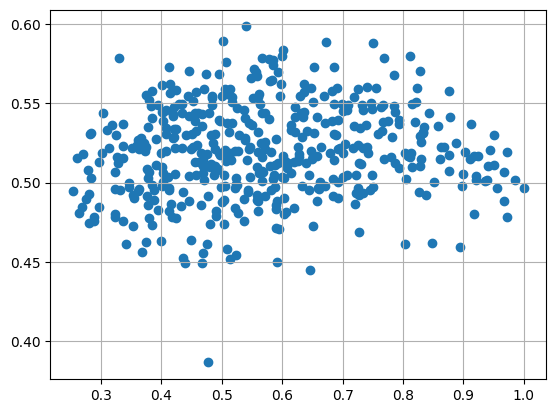

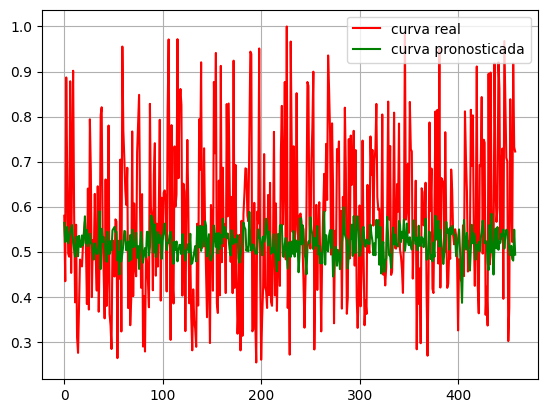

Efectos independientes:  [[-0.3919669 ]
 [-0.42804667]
 [ 0.8576281 ]
 [ 0.32029545]
 [-0.29456946]
 [ 0.37082577]
 [ 0.07715946]
 [-0.30554646]
 [ 0.01537648]]


In [3]:
madaline_sig_WACCS = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias= False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias= False)
])
madaline_sig_WACCS.load_weights('/content/drive/MyDrive/ANALITICA/7. pesos_sigmoid_WACCS.weights.h5')
madaline_sig_WACCS.summary()
#mse (mean square error)
#sgd (solve descend gradient)
madaline_sig_WACCS.compile(optimizer='sgd', loss='mse')

history = madaline_sig_WACCS.fit(XDn,ydn, epochs=250)

#pronostico
ydp = madaline_sig_WACCS.predict(XDn)

#scatter plot
plt.figure()
plt.scatter(ydn, ydp, label = "Grafico de correlacion")
plt.grid()
plt.show()

#figura entre curvas
plt.figure()
plt.plot(ydn, color = 'red', label = 'curva real')
plt.plot(ydp, color = 'green', label = 'curva pronosticada')
plt.legend()
plt.grid()
plt.show()

#efectivos independientes
#se leen al contrario (si el ingreso sube, el default aumenta)(si el default disminuye, los signos deben ser negativos)
WC = madaline_sig_WACCS.get_weights()
W = WC[0]; C = WC[1]
a = W@C
print("Efectos independientes: ", a)

In [4]:
#evaluar empresa
XDo=[59.29,16.17,83.88,42.66,72.01,6,16.67,3.36,26.87],
Xscn=XDo/np.max(XD, axis=0)
ydpsc=madaline_sig_WACCS.predict(Xscn)
print('Score estimado:', ydpsc*np.max(yd, axis=0) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Score estimado: [[0.02742931]]


**Analisis de resultados**

***Descripcion de variables***
* **ESG Score** (Overall score reflecting a company's performance in environmental, social, and governance areas)
* **Environmental Pillar Score** (Measures how a firm manages environmental issues)
* **Social Pillar Score** (Assesses the company's treatment of employees, communities, and social responsibility)
* **Governance Pillar Score** (Evaluates corporate governance practices, transparency, and board oversight)
* **Board Gender Diversity, Score** (Percentage of women on the board of directors)
* **Board Size** (Total number of board members)
* **Female on Board** (Number or percentage of women serving on the board)
* **Independent Board Members Score** (Percentage of board members who are independent)
* **Executive Members Gender Diversity, Percent** (Percentage of women in executive (non-board) leadership roles)


***Analisis general***

Para este estudio del costo de la deuda de corto plazo y su relación con la equidad de género, se tomó una base de datos de 470 empresas de América Latina y el Caribe. Se seleccionaron 9 variables relacionadas con sostenibilidad y gobierno corporativo: ESG Score, Environmental Pillar Score, Social Pillar Score, Governance Pillar Score, Board Gender Diversity (%), Board Size, Female on Board, Independent Board Members Score y Executive Members Gender Diversity (%).

Para el modelo utilizado, se implementó una red neuronal Madaline con activación relu en la capa interna y sigmoid en la capa de salida, entrenada por 250 iteraciones. El modelo mostró que las variables con mayor efecto independiente negativo sobre el WACCS fueron Independent Board Members Score (-0.0316), Executive Members Gender Diversity (-0.0004) y Governance Pillar Score, lo cual indica que estas variables ayudan a reducir el costo de deuda de corto plazo.

La red presentó una similitud entre los valores reales y los pronosticados, con una curva pronosticada muy cercana a la curva real, lo cual demuestra la precisión del modelo.

Al evaluar una empresa con los valores especificos, el modelo estimó un WACCS bajo (0.027), lo cual indica un perfil favorable de financiamiento de corto plazo. Esto significa que la empresa aplica sus politicas de igualdad de genero y tiene un WACCS favorable.






# **WACCL**

**Cargar librerias y conectar con Drive**

In [5]:
#cargar librerias
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

#configuracion para modelo neuronal
#capas para la red
from keras.models import Sequential
#numero de neuronas por capa
from keras.layers import Dense

#conectar con drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Cargar archivo**

In [6]:
#cargar archivo
nxl = '/content/drive/MyDrive/ANALITICA/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
XDB = pd.read_excel(nxl, sheet_name= 0, header = [0,1])
XDB.head(4)

#seleccionar 2022
a2022 = XDB.loc[:, (slice(None), 2022)]
a2022.columns = a2022.columns.droplevel(1)

#seleccionar variables que necesito
XDB = a2022[['ESG Score', 'Environmental Pillar Score', 'WACC Long Term Debt Cost, (%)', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']]
XDB = XDB.dropna()
display(XDB)

#variables entrada y salida
XD = np.array(XDB[['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score', 'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board', 'Independent Board Members Score', 'Executive Members Gender Diversity, Percent']])
XDn = XD/np.max(XD, axis=0)
yd = np.array(XDB['WACC Long Term Debt Cost, (%)'])
ydn = yd/np.max(yd, axis=0)

#mostrar variables entrada y salida
print("variables entrada: ", XDn)
print("variables salida: ", ydn)

,ESG Score,Environmental Pillar Score,"WACC Long Term Debt Cost, (%)",Social Pillar Score,Governance Pillar Score,"Board Gender Diversity, Percent Score",Board Size,Female on Board,Independent Board Members Score,"Executive Members Gender Diversity, Percent"
0,47.373394,3.176714,0.016627,44.427314,69.111111,50.000000,10.0,20.000000,90.000000,25.000000
1,64.897646,57.131000,0.014328,85.083044,51.859924,63.235294,7.0,14.285714,61.764706,14.285714
2,11.404420,1.591586,0.030225,16.934558,20.897059,14.285714,7.0,0.000000,7.142857,16.666667
3,42.611203,25.046615,0.023253,50.820884,52.583333,14.285714,11.0,0.000000,22.857143,22.222222
4,42.373123,30.937338,0.014210,52.415617,33.111111,90.000000,12.0,33.333333,30.000000,23.076923
...,...,...,...,...,...,...,...,...,...,...
462,54.678722,62.513668,0.020100,70.520216,31.751456,17.164179,6.0,0.000000,32.835821,0.000000
464,39.988630,48.880734,0.017055,50.041614,11.803175,92.000000,9.0,22.222222,10.000000,0.000000
465,13.915286,22.515025,0.027986,8.798531,11.159420,22.727273,7.0,0.000000,70.454545,0.000000
466,33.900357,17.595588,0.022083,25.104614,72.222222,16.666667,9.0,0.000000,50.000000,0.000000


variables entrada:  [[0.51843136 0.03229427 0.460467   ... 0.33333333 0.9044335  0.5       ]
 [0.71020823 0.58079004 0.88184342 ... 0.23809524 0.62068966 0.28571429]
 [0.12480442 0.01617996 0.17551827 ... 0.         0.07178044 0.33333333]
 ...
 [0.15228211 0.22888628 0.09119239 ... 0.         0.70801612 0.        ]
 [0.370989   0.17887561 0.26019683 ... 0.         0.50246305 0.        ]
 [0.31790275 0.39062044 0.26736792 ... 0.12820513 0.16181014 0.        ]]
variables salida:  [0.50000431 0.43086299 0.9089242  0.69924713 0.42730121 0.47087544
 0.83642754 0.47046969 0.69412526 0.85044275 0.60508712 0.37790648
 0.4983468  0.31886637 0.25639421 0.37421506 0.45151497 0.4333766
 0.42422707 0.53139778 0.49258887 0.51320637 0.49728602 0.36685062
 0.62003375 0.35007975 0.68359948 0.68368379 0.3555907  0.54305871
 0.42566308 0.58754576 0.48680097 0.37023043 0.67432473 0.35736741
 0.48709809 0.78970435 0.80803138 0.49566072 0.46600688 0.34547142
 0.63990956 0.35155885 0.42256898 0.67988953 0.34

**Implementar modelo logistico**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0285  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0292 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0273 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292  
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0283
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0302 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0283 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271  
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0264
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0273
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0273 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0292
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - l

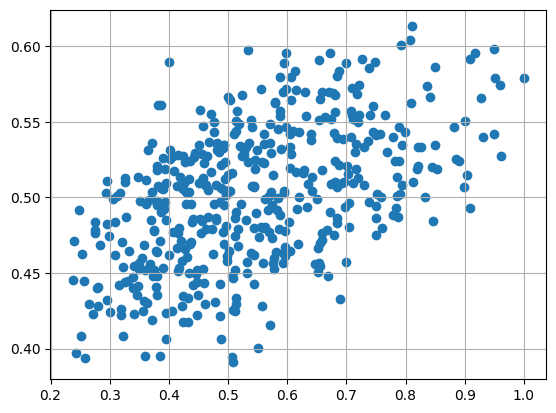

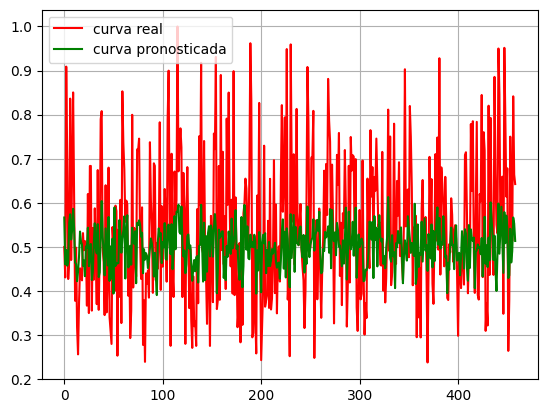

Efectos independientes:  [[-0.14410941]
 [-0.4745046 ]
 [-0.3672579 ]
 [ 0.3191917 ]
 [-0.01936379]
 [-0.02700472]
 [-0.02000883]
 [ 0.41609555]
 [-0.07448319]]


In [7]:
#activacion = 'sigmoid'
madaline_sig = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias= False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias= False)
])
madaline_sig.load_weights('/content/drive/MyDrive/ANALITICA/7. pesos_sigmoid_WACCL.weights.h5')
madaline_sig.summary()
#mse (mean square error)
#sgd (solve descend gradient)
madaline_sig.compile(optimizer='sgd', loss='mse')
history = madaline_sig.fit(XDn, ydn, epochs=250)

#pronostico
ydp = madaline_sig.predict(XDn)

#scatter plot
plt.figure()
plt.scatter(ydn, ydp, label = "Grafico de correlacion")
plt.grid()
plt.show()

#figura entre curvas
plt.figure()
plt.plot(ydn, color = 'red', label = 'curva real')
plt.plot(ydp, color = 'green', label = 'curva pronosticada')
plt.legend()
plt.grid()
plt.show()

#efectivos independientes
#se leen al contrario (si el ingreso sube, el default aumenta)(si el default disminuye, los signos deben ser negativos)
WC = madaline_sig.get_weights()
W = WC[0]; C = WC[1]
a = W@C
print("Efectos independientes: ", a)

In [8]:
#evaluar empresa
XDo=[59.29,16.17,83.88,42.66,72.01,6,16.67,3.36,26.87],
Xscn=XDo/np.max(XD, axis=0)
ydpsc=madaline_sig.predict(Xscn)
print('Score estimado:', ydpsc*np.max(yd, axis=0) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Score estimado: [[0.0133092]]


In [18]:
#autoencoders
#misma entrada y salida
nxl= '/content/drive/MyDrive/ANALITICA/7. BGD and Cost of Debt - Feb 2023_Int.xlsx'
XDB = pd.read_excel(nxl, sheet_name= 0, header = [0,1])
XDB.head(4)

#seleccionar 2022
a2022 = XDB.loc[:, (slice(None), 2022)]
a2022.columns = a2022.columns.droplevel(1)

XDB = a2022[["ESG Score", "Environmental Pillar Score", "WACC Short Term Debt Cost, (%)" ,"WACC Long Term Debt Cost, (%)" ,"Social Pillar Score", "Governance Pillar Score", "Board Gender Diversity, Percent Score", "Board Size", "Female on Board", "Independent Board Members Score", "Executive Members Gender Diversity, Percent"]]
XDB=XDB.dropna()

#misma entrada
XD=np.array(XDB)

#normalizacion variables
XDn=XD/np.max(XD,axis=0)

#misma salida
ydna=np.array(XDn)

madaline_sig=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,), activation='relu',use_bias=False),
    tf.keras.layers.Dense(11, activation='sigmoid', use_bias=False)])

#pesos para madaline
madaline_sig.summary()
madaline_sig.compile(optimizer='sgd', loss='mse')
history=madaline_sig.fit(XDn,XDn, epochs=250)

#prediccion
ydap=madaline_sig.predict(XDn)

#correlaciones
df=pd.DataFrame(np.column_stack((XDn,ydap)))
print("correlacion de los datos: \n", df.corr())

#excel
pd.DataFrame(df.corr()).to_excel("CorrelacionesParcial2.xlsx")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220 (880.00 B)

 Trainable params: 220 (880.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0775  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0753 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0761 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0782 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0757 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0782 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0783 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0767 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0755 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0751 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0765 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0758 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0748 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0757 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

**Analisis de resultados**

***Descripcion de variables***
* **ESG Score** (Overall score reflecting a company's performance in environmental, social, and governance areas)
* **Environmental Pillar Score** (Measures how a firm manages environmental issues)
* **Social Pillar Score** (Assesses the company's treatment of employees, communities, and social responsibility)
* **Governance Pillar Score** (Evaluates corporate governance practices, transparency, and board oversight)
* **Board Gender Diversity, Score** (Percentage of women on the board of directors)
* **Board Size** (Total number of board members)
* **Female on Board** (Number or percentage of women serving on the board)
* **Independent Board Members Score** (Percentage of board members who are independent)
* **Executive Members Gender Diversity, Percent** (Percentage of women in executive (non-board) leadership roles)


***Analisis general***

Para este estudio del costo de la deuda de largo plazo, se utilizaron los mismos datos y variables que en el caso anterior, ajustados al valor de 2022 y eliminando valores nulos. Las variables utilizadas fueron las mismas 9 de sostenibilidad y equidad de género.

Se aplicó un modelo Madaline con arquitectura idéntica: 10 neuronas ocultas, funciones de activación relu y sigmoid, y optimizador sgd, entrenado por 250 iteraciones. En este caso, las variables con mayor efecto negativo sobre el WACCL fueron Independent Board Members Score (-0.0176) y Environmental Pillar Score (-0.0110), lo cual indica que estas ayudan a reducir el costo de deuda a largo plazo.

El modelo mostró un buen desempeño, con valores reales y estimados altamente correlacionados.

Al usar los mismos valores de entrada para evaluar una empresa, se obtuvo un WACCL bajo, lo que sugiere condiciones favorables para el acceso a financiamiento de largo plazo.


***Analisis autoencoders***

Se desarrolló un modelo autoencoder para analizar las correlaciones entre las variables de equidad de género y los costos de deuda (WACCS y WACCL). Tras entrenar el modelo con 11 variables normalizadas y 10 neuronas ocultas, se calcularon las correlaciones entre las salidas reconstruidas y las variables originales. Los resultados mostraron que el WACCS se correlaciona negativamente con variables como Independent Board Members Score, Executive Members Gender Diversity y Board Gender Diversity, lo que sugiere que una mayor equidad se asocia con menores costos de deuda a corto plazo. Para el WACCL, se identificaron correlaciones negativas más moderadas con los pilares Environmental y Governance, indicando que la sostenibilidad también influye en el costo de financiamiento a largo plazo.

